In [1]:
using StatsBase

From the calculations of the DFA for the $1744$ orbits, one can fit them into a power law $F(n) \propto n^\alpha$ and find the distribution of $\alpha$ for different orbits.

This is done in the following codes:

In [23]:
using DelimitedFiles
using CurveFit

mVectorSize = 180
MaxRand = 10
maximumPrimeBlockSize =  6
types = ["Random","Prime"]
fits = []

for i in 1:length(types)
    tipo = types[i]
    for j in 2:maximumPrimeBlockSize
        primeBlockSize = j
        for k in 1:factorial(primeBlockSize)
            detrended = readdlm("D:/WINDOWS/Usuario/Documents/Collatz_map/DATA/DFA_STATIONARY/dfa_n_0_$(k)_$(tipo)_mVectorSize_$(mVectorSize)_MaxRand_$(MaxRand)_primeBlockSize_$(j).csv")
            fit = power_fit(detrended[:,1],detrended[:,2])
            fits = vcat(fits,fit[2])
        end
    end
end
fits

1744-element Vector{Any}:
 1.9036181374239676
 2.0316971476484555
 1.9826605306490035
 2.1096950274752486
 2.0002665876570096
 1.9578456636923331
 2.1493151287693193
 2.2365407624204936
 1.8705581759379872
 1.7754455042284913
 1.8722889875670388
 2.050929168200657
 1.827262851774091
 ⋮
 2.2445864626983565
 2.02326521856178
 1.976323327523578
 1.93586974964169
 1.9280268286167372
 2.076682397627477
 2.1685429599382644
 2.29985270319133
 2.015861639957479
 1.8589735790700517
 2.1045040987637504
 1.6717997369498743

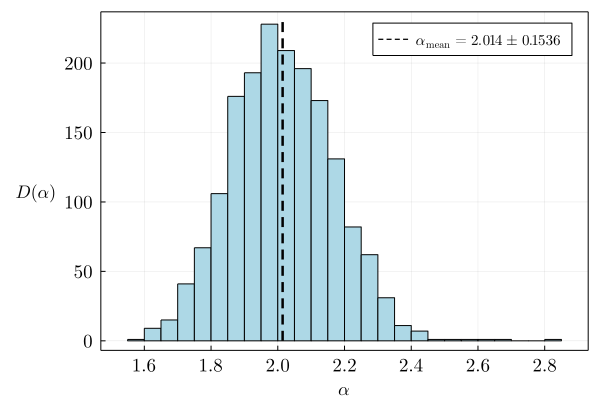

In [26]:
using Plots, LaTeXStrings, Plots.PlotMeasures
average = mean(fits)
stdDeviation = std(fits)
histogram(fits, 
    c=:lightblue, fontfamily = "Computer Modern", xlabel = L"\alpha", ylabel = L"D(\alpha)", yguidefontrotation = -90,
    legendfontsize = 10, yguidefontsize = 12, xguidefontsize = 12, tickfontsizes = 12,
    left_margin = 10mm, framestyle = :box,
    label = :false)
plot!([mean(fits);mean(fits)],[0;230], ls = :dash, lw = 2.5, lc = :black, label = label = L"\alpha_{\mathrm{mean}} =  %$(Float16(average)) \pm %$(Float16(stdDeviation[1]))")